In [19]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

FILE="NGT20-11.12.pg_matrix.tsv"

df = pd.read_csv(FILE,sep="\t",index_col=0)
print("before decontamination: "+str(df.shape))

#remove proteins from contaminant database
#contaminants=["ALBU_HUMAN", "AMY1A_HUMAN", "AMY1B_HUMAN", "AMY1C_HUMAN", "ANT3_HUMAN", "ANXA5_HUMAN", "B2MG_HUMAN", "BID_HUMAN", "CAH1_HUMAN", "CAH2_HUMAN", "CATA_HUMAN", "CATD_HUMAN", "CATG_HUMAN", "CO5_HUMAN", "CRP_HUMAN", "CYB5_HUMAN", "CYC_HUMAN", "EGF_HUMAN", "FABPH_HUMAN", "GELS_HUMAN", "GSTA1_HUMAN", "GSTP1_HUMAN", "HBA_HUMAN", "HBB_HUMAN", "HBEGF_HUMAN", "IGF2_HUMAN", "IL8_HUMAN", "INHBA_HUMAN", "INHBB_HUMAN", "KCRM_HUMAN", "LALBA_HUMAN", "LEP_HUMAN", "LYSC_HUMAN", "MYG_HUMAN", "NEDD8_HUMAN", "NQO1_HUMAN", "NQO2_HUMAN", "PDGFB_HUMAN", "PPIA_HUMAN", "PRDX1_HUMAN", "RASH_HUMAN", "RET4_HUMAN", "RS27A_HUMAN", "SODC_HUMAN", "SUMO1_HUMAN", "HARS1_HUMAN", "TAU_HUMAN", "THIO_HUMAN", "TNFA_HUMAN", "TRFE_HUMAN", "TRFL_HUMAN", "UB2E1_HUMAN", "UBE2C_HUMAN", "K1C26_HUMAN", "K2C3_HUMAN", "K1C15_HUMAN", "K2C79_HUMAN", "K2C6B_HUMAN", "K1C17_HUMAN", "K2C4_HUMAN", "K2C73_HUMAN", "K2C71_HUMAN", "K2C7_HUMAN", "K2C8_HUMAN", "K1C39_HUMAN", "K1C18_HUMAN", "K1C28_HUMAN", "K1C16_HUMAN", "K2C1_HUMAN", "K2C5_HUMAN", "K2C80_HUMAN", "K2C1B_HUMAN", "K2C75_HUMAN", "K2C6A_HUMAN", "K2C72_HUMAN", "K1C24_HUMAN", "K1C19_HUMAN", "K2C74_HUMAN", "K1C27_HUMAN", "K1C20_HUMAN", "K1C9_HUMAN", "K1C23_HUMAN", "K1C12_HUMAN", "K1C14_HUMAN", "K2C6C_HUMAN", "K1C10_HUMAN", "K1C13_HUMAN", "K22O_HUMAN", "K1C25_HUMAN", "K2C78_HUMAN", "K22E_HUMAN", "K1C40_HUMAN", "KRT85_HUMAN", "KRT38_HUMAN", "KRT34_HUMAN", "KRT86_HUMAN", "KRT35_HUMAN", "KT33B_HUMAN", "KRT81_HUMAN", "KRT37_HUMAN", "KT33A_HUMAN", "KRT83_HUMAN", "K1H1_HUMAN", "KRT82_HUMAN", "K1H2_HUMAN", "KRT36_HUMAN", "KRT84_HUMAN"]
contaminants=["P02768", "P0DUB6", "P0DTE7", "P0DTE8", "P01008", "P08758", "P61769", "P55957", "P00915", "P00918", "P04040", "P07339", "P08311", "P01031", "P02741", "P00167", "P99999", "P01133", "P05413", "P06396", "P08263", "P09211", "P69905", "P68871", "Q99075", "P01344", "P10145", "P08476", "P09529", "P06732", "P00709", "P41159", "P61626", "P02144", "Q15843", "P15559", "P16083", "P01127", "P62937", "Q06830", "P01112", "P02753", "P62979", "P00441", "P63165", "P12081", "P10636", "P10599", "P01375", "P02787", "P02788", "P51965", "O00762", "Q7Z3Y9", "P12035", "P19012", "Q5XKE5", "P04259", "Q04695", "P19013", "Q86Y46", "Q3SY84", "P08729", "P05787", "Q6A163", "P05783", "Q7Z3Y7", "P08779", "P04264", "P13647", "Q6KB66", "Q7Z794", "O95678", "P02538", "Q14CN4", "Q2M2I5", "P08727", "Q7RTS7", "Q7Z3Y8", "P35900", "P35527", "Q9C075", "Q99456", "P02533", "P48668", "P13645", "P13646", "Q01546", "Q7Z3Z0", "Q8N1N4", "P35908", "Q6A162", "P78386", "O76015", "O76011", "O43790", "Q92764", "Q14525", "Q14533", "O76014", "O76009", "P78385", "Q15323", "Q9NSB4", "Q14532", "O76013", "Q9NSB2"]
df = df[~df.index.isin(contaminants)]

print("after decontamination: "+str(df.shape))
df.head()


before decontamination: (6968, 15)
after decontamination: (6925, 15)


,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-2.raw
Protein.Group,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,265551.0,314947.0,408904.0,338063.0,335581.0,319682.0,289938.0,251941.0,415817.0,284434.0,388964.0,344538.0
A0A075B6F9,A0A075B6F9_HUMAN,NOSIP,Nitric oxide synthase-interacting protein,925238.0,964710.0,1219390.0,1155630.0,841614.0,917271.0,1045270.0,959617.0,1073080.0,928598.0,1146440.0,1089260.0
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,185322.0,208922.0,185530.0,224145.0,229481.0,302161.0,320670.0,366942.0,232473.0,270700.0,218635.0,191807.0
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,26608100.0,29884900.0,54253200.0,47236900.0,13084800.0,8551040.0,NaN,12874400.0,NaN,NaN,18354800.0,19333900.0
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,537506.0,881318.0,126049.0,421432.0,307087.0,NaN,410105.0,NaN,447267.0,73908.3,29091.2,700437.0


In [20]:
group_columns = {
    'DMSO': [x for x in df.columns if "DMSO" in x],
    'NGT20-11_10uM': [x for x in df.columns if "NGT20-11" in x],
    'NGT20-12_10uM': [x for x in df.columns if "NGT20-12" in x]}

print(group_columns)
for key in group_columns:
    print(str(key)+": "+str(len(group_columns[key])))

{'DMSO': ['Z:\\Astral Data\\20241125_Jurkat200ng_DMSO_1-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_DMSO_1-2.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_DMSO_2-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_DMSO_2-2.raw'], 'NGT20-11_10uM': ['Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-11_10uM_1-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-11_10uM_1-2.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-11_10uM_2-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-11_10uM_2-2.raw'], 'NGT20-12_10uM': ['Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-12_10uM_1-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-12_10uM_1-2.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-12_10uM_2-1.raw', 'Z:\\Astral Data\\20241125_Jurkat200ng_NGT20-12_10uM_2-2.raw']}
DMSO: 4
NGT20-11_10uM: 4
NGT20-12_10uM: 4


In [21]:
# Calculate FC value and append to the right side
def calculate_average_FC_value(df, treated_group_name, control_group_name):
    control_group = group_columns[control_group_name]
    treated_group = group_columns[treated_group_name]
    
    control_avg = df[control_group].mean(axis=1)
    treated_avg = df[treated_group].mean(axis=1)
    
    FC_values = treated_avg / control_avg
    
    FC_column_name = f'FC_{treated_group_name}_vs_{control_group_name}'
    df[FC_column_name] = FC_values
    
    log2FC_values = np.log2(FC_values)
    
    log2FC_column_name = f'log2FC_{treated_group_name}_vs_{control_group_name}'
    df[log2FC_column_name] = log2FC_values
    
    return df

# Calculate FC values for PS10_200nM vs DMSO and PS10NW_200nM vs DMSO
df = calculate_average_FC_value(df, 'NGT20-11_10uM', 'DMSO')
df = calculate_average_FC_value(df, 'NGT20-12_10uM', 'DMSO')



df.head()

,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-2.raw,FC_NGT20-11_10uM_vs_DMSO,log2FC_NGT20-11_10uM_vs_DMSO,FC_NGT20-12_10uM_vs_DMSO,log2FC_NGT20-12_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,265551.0,314947.0,408904.0,338063.0,335581.0,319682.0,289938.0,251941.0,415817.0,284434.0,388964.0,344538.0,0.901826,-0.149080,1.080068,0.111123
A0A075B6F9,A0A075B6F9_HUMAN,NOSIP,Nitric oxide synthase-interacting protein,925238.0,964710.0,1219390.0,1155630.0,841614.0,917271.0,1045270.0,959617.0,1073080.0,928598.0,1146440.0,1089260.0,0.882485,-0.180356,0.993531,-0.009363
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,185322.0,208922.0,185530.0,224145.0,229481.0,302161.0,320670.0,366942.0,232473.0,270700.0,218635.0,191807.0,1.516638,0.600877,1.136452,0.184536
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,26608100.0,29884900.0,54253200.0,47236900.0,13084800.0,8551040.0,NaN,12874400.0,NaN,NaN,18354800.0,19333900.0,0.291257,-1.779636,0.477123,-1.067566
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,537506.0,881318.0,126049.0,421432.0,307087.0,NaN,410105.0,NaN,447267.0,73908.3,29091.2,700437.0,0.729482,-0.455056,0.636068,-0.652747


In [ ]:
# Function to perform a student t-test
def student_t_test(row, treated_group_name, control_group_name,min_valid_value=3): # valid value = Not NaN
    treated_values = row[group_columns[treated_group_name]].dropna().values
    control_values = row[group_columns[control_group_name]].dropna().values
    
    if len(treated_values) <min_valid_value or len(control_values) <min_valid_value:
        return np.nan
    
    return ttest_ind(treated_values, control_values, equal_var=True).pvalue

# Calculate p-values for PS10_200nM vs DMSO
df['Pvalue_NGT20-11_10uM_vs_DMSO'] = df.apply(student_t_test, axis=1, treated_group_name='NGT20-11_10uM', control_group_name='DMSO')
df['Pvalue_NGT20-12_10uM_vs_DMSO'] = df.apply(student_t_test, axis=1, treated_group_name='NGT20-12_10uM', control_group_name='DMSO')


# Display the updated DataFrame
df.head()

,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-1.raw,...,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-2.raw,FC_NGT20-11_10uM_vs_DMSO,log2FC_NGT20-11_10uM_vs_DMSO,FC_NGT20-12_10uM_vs_DMSO,log2FC_NGT20-12_10uM_vs_DMSO,Pvalue_NGT20-11_10uM_vs_DMSO,Pvalue_NGT20-12_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,265551.0,314947.0,408904.0,338063.0,335581.0,319682.0,289938.0,...,415817.0,284434.0,388964.0,344538.0,0.901826,-0.149080,1.080068,0.111123,0.388132,0.544550
A0A075B6F9,A0A075B6F9_HUMAN,NOSIP,Nitric oxide synthase-interacting protein,925238.0,964710.0,1219390.0,1155630.0,841614.0,917271.0,1045270.0,...,1073080.0,928598.0,1146440.0,1089260.0,0.882485,-0.180356,0.993531,-0.009363,0.183295,0.938212
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,185322.0,208922.0,185530.0,224145.0,229481.0,302161.0,320670.0,...,232473.0,270700.0,218635.0,191807.0,1.516638,0.600877,1.136452,0.184536,0.013652,0.198657
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,26608100.0,29884900.0,54253200.0,47236900.0,13084800.0,8551040.0,NaN,...,NaN,NaN,18354800.0,19333900.0,0.291257,-1.779636,0.477123,-1.067566,0.017343,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,537506.0,881318.0,126049.0,421432.0,307087.0,NaN,410105.0,...,447267.0,73908.3,29091.2,700437.0,0.729482,-0.455056,0.636068,-0.652747,NaN,0.453616


In [23]:
# Apply Benjamini-Hochberg FDR correction, handling NaN values
def apply_bh_fdr(p_values):
    mask = np.isfinite(p_values)
    p_values_corrected = np.full(p_values.shape, np.nan)
    p_values_corrected[mask] = multipletests(p_values[mask], method='fdr_bh')[1]
    return p_values_corrected

# Apply BH FDR correction for each set of p-values
df['bh_FDR_NGT20-11_10uM_vs_DMSO'] = apply_bh_fdr(df['Pvalue_NGT20-11_10uM_vs_DMSO'])
df['bh_FDR_NGT20-12_10uM_vs_DMSO'] = apply_bh_fdr(df['Pvalue_NGT20-12_10uM_vs_DMSO'])


df.head()


,Protein.Names,Genes,First.Protein.Description,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_DMSO_2-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_1-2.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-11_10uM_2-1.raw,...,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-1.raw,Z:\Astral Data\20241125_Jurkat200ng_NGT20-12_10uM_2-2.raw,FC_NGT20-11_10uM_vs_DMSO,log2FC_NGT20-11_10uM_vs_DMSO,FC_NGT20-12_10uM_vs_DMSO,log2FC_NGT20-12_10uM_vs_DMSO,Pvalue_NGT20-11_10uM_vs_DMSO,Pvalue_NGT20-12_10uM_vs_DMSO,bh_FDR_NGT20-11_10uM_vs_DMSO,bh_FDR_NGT20-12_10uM_vs_DMSO
Protein.Group,,,,,,,,,,,,,,,,,,,,,
A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,NUDT4;NUDT4B,Diphosphoinositol polyphosphate phosphohydrola...,265551.0,314947.0,408904.0,338063.0,335581.0,319682.0,289938.0,...,388964.0,344538.0,0.901826,-0.149080,1.080068,0.111123,0.388132,0.544550,0.651379,0.742321
A0A075B6F9,A0A075B6F9_HUMAN,NOSIP,Nitric oxide synthase-interacting protein,925238.0,964710.0,1219390.0,1155630.0,841614.0,917271.0,1045270.0,...,1146440.0,1089260.0,0.882485,-0.180356,0.993531,-0.009363,0.183295,0.938212,0.463611,0.971936
A0A075B6H7;A0A0C4DH55;P01624,KV315_HUMAN;KV37_HUMAN;KVD07_HUMAN,IGKV3-15;IGKV3-7;IGKV3D-7,Probable non-functional immunoglobulin kappa v...,185322.0,208922.0,185530.0,224145.0,229481.0,302161.0,320670.0,...,218635.0,191807.0,1.516638,0.600877,1.136452,0.184536,0.013652,0.198657,0.135846,0.441540
A0A075B6J9;P01699;P01700;P01703;P01706;P01709,LV140_HUMAN;LV144_HUMAN;LV147_HUMAN;LV208_HUMA...,IGLV1-40;IGLV1-44;IGLV1-47;IGLV2-11;IGLV2-18;I...,Immunoglobulin lambda variable 2-18,26608100.0,29884900.0,54253200.0,47236900.0,13084800.0,8551040.0,NaN,...,18354800.0,19333900.0,0.291257,-1.779636,0.477123,-1.067566,0.017343,NaN,0.155649,NaN
A0A075B6Y3,TJA3_HUMAN,TRAJ3,T cell receptor alpha joining 3,537506.0,881318.0,126049.0,421432.0,307087.0,NaN,410105.0,...,29091.2,700437.0,0.729482,-0.455056,0.636068,-0.652747,NaN,0.453616,NaN,0.671088


In [24]:
df.to_csv(FILE.split(".")[0]+"_analyzed.csv")

In [32]:
# Volcano Plot
import matplotlib.pylab as plt
import seaborn as sns
from adjustText import adjust_text

def volcano_plot(treatment_group, control_group, logFC_cutoff=1, logFC_cutoff2=None, FDR_cutoff=0.05, file_suffix="", highlight_genes=[], protein_level_cutoff=None):
    logFC="log2FC_"+treatment_group+"_vs_"+control_group
    FDR="bh_FDR_"+treatment_group+"_vs_"+control_group
    plt.figure(figsize=(12, 9))

    plt.scatter(x=df[logFC],y=df[FDR].apply(lambda x:-np.log10(x)),s=1, color="grey")

    down = df[(df[logFC]<=-logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    if logFC_cutoff2:    
        slight_down = df[(df[logFC]>-logFC_cutoff) & (df[logFC]<=-logFC_cutoff2)&(df[FDR]<=FDR_cutoff)]
    else:
        slight_down = None

    up = df[(df[logFC]>=logFC_cutoff)&(df[FDR]<=FDR_cutoff)]
    
    plt.scatter(x=up[logFC],y=up[FDR].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

    if not (logFC_cutoff2 or protein_level_cutoff):
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    
    if logFC_cutoff2:
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label=">50% Down-regulated",color="blue")
        plt.scatter(x=slight_down[logFC],y=slight_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="30-50% Down-regulated",color="turquoise")
    
    if protein_level_cutoff:
        lowabundance_down=df[(df[logFC]<=-logFC_cutoff) & (df[FDR]<=FDR_cutoff) & (df[group_columns[control_group]].mean(axis=1)<1000)]
        plt.scatter(x=down[logFC],y=down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
        plt.scatter(x=lowabundance_down[logFC],y=lowabundance_down[FDR].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated, protein level<"+str(protein_level_cutoff),color="turquoise")

    if highlight_genes:
        highlight = df.loc[highlight_genes]
        plt.scatter(x=highlight[logFC], y=highlight[FDR].apply(lambda x:-np.log10(x)), color='green')
    else:
        highlight = None

    
    texts=[]
    for i,r in pd.concat([up,down,slight_down,highlight]).drop_duplicates().iterrows():
        #texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=i.split("_")[0]))
        texts.append(plt.text(x=r[logFC],y=-np.log10(r[FDR]),s=r['Genes'], size=14))

    
    plt.xlim(-5,5)
    plt.ylim(-0.5,5.5)

    plt.ylabel("-logFDR", size=16)
    plt.title(logFC.split("_", maxsplit=1)[1]+"\nn="+str(len(df[logFC].dropna())),size=24)
    plt.axvline(-logFC_cutoff,color="grey",linestyle="--")
    if logFC_cutoff2:
        plt.axvline(-logFC_cutoff2,color="grey",linestyle="--") 
    plt.axvline(logFC_cutoff,color="grey",linestyle="--")
    plt.axhline(-np.log10(FDR_cutoff),color="grey",linestyle="--")
    plt.legend(loc="upper right", fontsize=16)
    logFC=logFC[:3]+"\u2082"+logFC[4:]
    plt.xlabel(logFC, labelpad=10, size=16)


    adjust_text(texts, force_text=(0.5,1),force_static =(1,2),arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.savefig(logFC+file_suffix+'_4bio+techrep_publication.png', transparent=True)



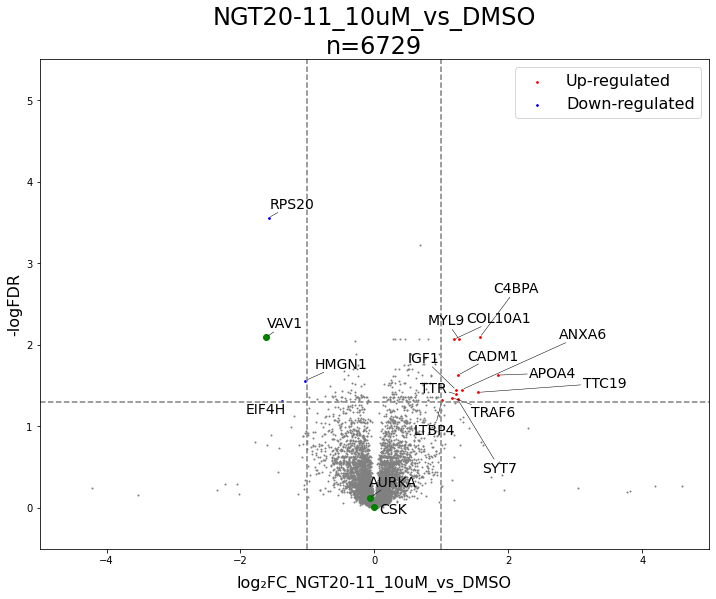

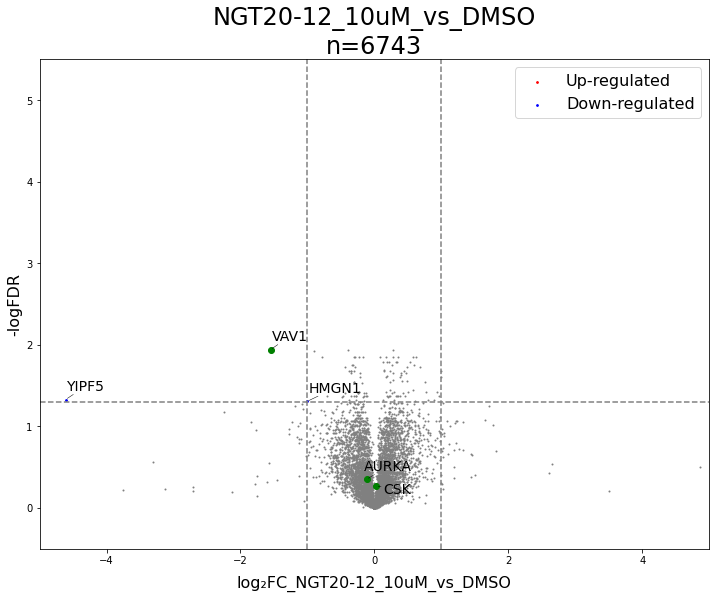

In [33]:
volcano_plot("NGT20-11_10uM", "DMSO", highlight_genes=["Q96D37","P41240","O14965"])
volcano_plot("NGT20-12_10uM", "DMSO", highlight_genes=["Q96D37","P41240","O14965"])


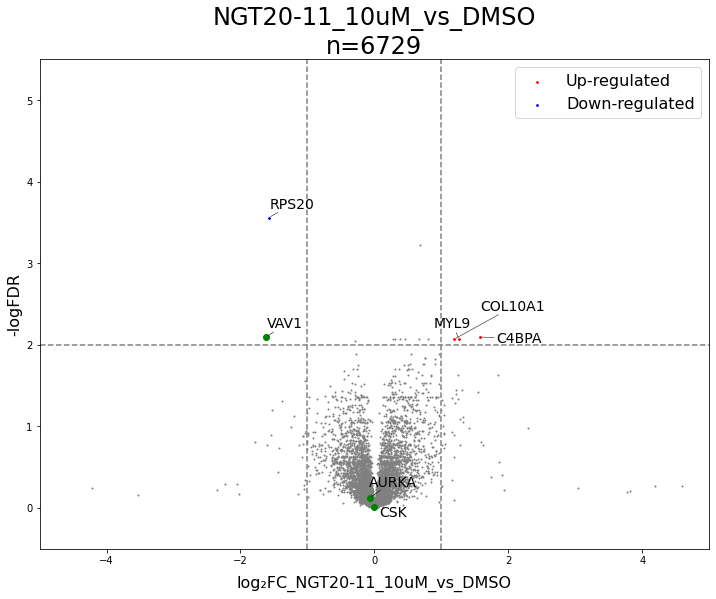

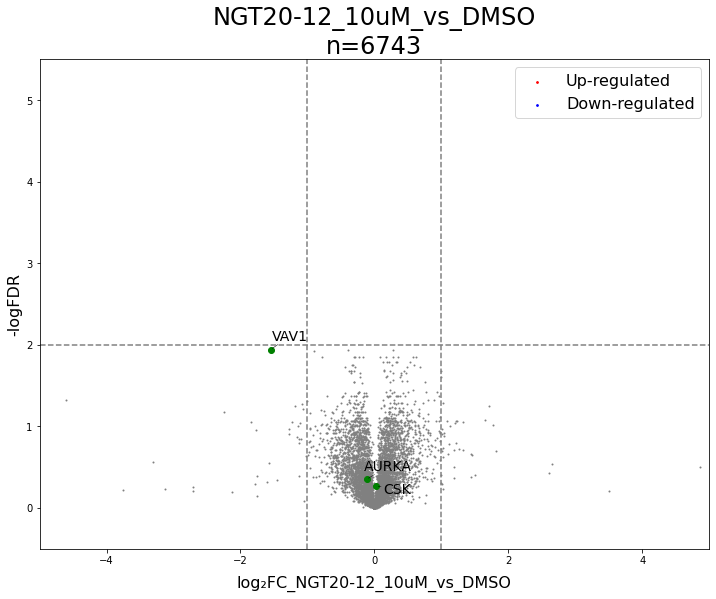

In [34]:
volcano_plot("NGT20-11_10uM", "DMSO",FDR_cutoff=0.01, file_suffix="_clean", highlight_genes=["Q96D37","P41240","O14965"])
volcano_plot("NGT20-12_10uM", "DMSO",FDR_cutoff=0.01, file_suffix="_clean", highlight_genes=["Q96D37","P41240","O14965"])



